In [ ]:
pip install citipy

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create empty list to store the responses
# response_json = []

In [ ]:
# Print the log for each cities
print("Beginning Data Retrieval")
print("--------------------------------------")

# Make a request for each citiews
for city in range(len(cities)):
    
    query_url = url + "appid=" + api_key + "&q=" + cities[city]
    response = requests.get(query_url)
        
    response_json.append(response.json())
    
#     if city < 50:
#         print("Processing Record " + (city + 1) + " of Set 1 | " + cities[city])
        
#     if 50 < city < 101:
#         print("Processing Record " + (city - 50) + " of Set 2 | " + cities[city])
        
#     if 101 < city    
    
    try:
        print(f"Processing Record {city} | {cities[city]}")
        
    except (HTTPError, KeyError, IndexError):
        print("City not found. Skipping...")
    
    

## Convert Raw Data to DataFrame

- Export the city data into a .csv.
- Display the DataFrame

In [5]:
# Set up lists to hold response values
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
cities_to_remove = []

print("Beginning Data Retrieval")
print("--------------------------------------")

# Loop through the list of cities and perform a request for the data of each cities
for city in range(len(cities)):
    query_url = url + "appid=" + api_key + "&q=" + cities[city]
    response = requests.get(query_url)
    response_json = response.json()
    
    try:
        # Collect the weather data for each cities
        cloudiness.append(response_json["clouds"]["all"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        humidity.append(response_json["main"]["humidity"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        wind_speed.append(response_json["wind"]["speed"])
        
        # Print the log for each cities
        print(f"Processing Record {city} | {cities[city]}")
        
    except (KeyError, IndexError):
        print(f"Processing Record {city} | {cities[city]}")
        print("City not found. Skipping...")
        cities_to_remove.append(cities[city])


print("--------------------------------------")
print("Data Retrival Complete")
print("--------------------------------------")

Beginning Data Retrieval
--------------------------------------
Processing Record 0 | jardim
Processing Record 1 | carnarvon
Processing Record 2 | lorengau
Processing Record 3 | pangnirtung
Processing Record 4 | punta arenas
Processing Record 5 | kapaa
Processing Record 6 | qaanaaq
Processing Record 7 | chokurdakh
Processing Record 8 | louisbourg
City not found. Skipping...
Processing Record 9 | bengkulu
City not found. Skipping...
Processing Record 10 | bestobe
Processing Record 11 | quatre cocos
Processing Record 12 | rikitea
Processing Record 13 | ushuaia
Processing Record 14 | busselton
Processing Record 15 | bluff
Processing Record 16 | horki
Processing Record 17 | kutum
Processing Record 18 | maniitsoq
Processing Record 19 | attawapiskat
City not found. Skipping...
Processing Record 20 | torbay
Processing Record 21 | carutapera
Processing Record 22 | illoqqortoormiut
City not found. Skipping...
Processing Record 23 | homer
Processing Record 24 | pangody
Processing Record 25 | vai

Processing Record 228 | ancud
Processing Record 229 | sladkovo
Processing Record 230 | jalu
Processing Record 231 | angoche
Processing Record 232 | grindavik
Processing Record 233 | mvuma
Processing Record 234 | dolores
Processing Record 235 | westport
Processing Record 236 | kurilsk
Processing Record 237 | yulara
Processing Record 238 | villacarrillo
Processing Record 239 | guozhen
Processing Record 240 | lisala
Processing Record 241 | bonavista
Processing Record 242 | whitehorse
Processing Record 243 | valdivia
Processing Record 244 | mumford
Processing Record 245 | gazli
Processing Record 246 | puerto ayora
Processing Record 247 | deputatskiy
Processing Record 248 | fountain hills
Processing Record 249 | ituni
City not found. Skipping...
Processing Record 250 | benguela
Processing Record 251 | daru
Processing Record 252 | road town
Processing Record 253 | castro
Processing Record 254 | barentsburg
City not found. Skipping...
Processing Record 255 | ostrovnoy
Processing Record 256 | 

Processing Record 446 | richards bay
Processing Record 447 | madang
Processing Record 448 | mandera
Processing Record 449 | ikom
Processing Record 450 | monrovia
Processing Record 451 | lompoc
Processing Record 452 | ruteng
Processing Record 453 | fare
Processing Record 454 | enid
Processing Record 455 | calama
Processing Record 456 | awjilah
Processing Record 457 | bambanglipuro
Processing Record 458 | wajir
Processing Record 459 | lebork
Processing Record 460 | malwan
City not found. Skipping...
Processing Record 461 | oelde
Processing Record 462 | hibbing
Processing Record 463 | shenzhen
Processing Record 464 | coronado
Processing Record 465 | ginir
Processing Record 466 | lakes entrance
Processing Record 467 | leua
Processing Record 468 | port lincoln
Processing Record 469 | dalby
Processing Record 470 | fuyu
Processing Record 471 | kroya
Processing Record 472 | payson
Processing Record 473 | karratha
Processing Record 474 | fort saint james
Processing Record 475 | kununurra
Proces

In [6]:
print(f"Number of cities with no data: {len(cities_to_remove)}")

Number of cities with no data: 73


In [7]:
for city_to_remove in cities_to_remove:
    cities.remove(city_to_remove)
    
print(f"Number of cities with data: {len(cities)}")

Number of cities with data: 548


In [8]:
print(f"Number of City: {len(cities)}")
print(f"Number of Cloudiness: {len(cloudiness)}")
print(f"Number of Country: {len(country)}")
print(f"Number of Date: {len(date)}")
print(f"Number of Humidity: {len(humidity)}")
print(f"Number of Latitude: {len(lat)}")
print(f"Number of Longitude: {len(lng)}")
print(f"Number of Max Temperature: {len(max_temp)}")
print(f"Number of Wind Speed: {len(wind_speed)}")

Number of City: 548
Number of Cloudiness: 548
Number of Country: 548
Number of Date: 548
Number of Humidity: 548
Number of Latitude: 548
Number of Longitude: 548
Number of Max Temperature: 548
Number of Wind Speed: 548


In [9]:
# Create DataFrame
weather_data = pd.DataFrame({
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Maximum Temperature": max_temp,
    "Wind Speed": wind_speed
})
weather_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,jardim,72,BR,1577773819,72,-21.48,-56.15,297.83,0.96
1,carnarvon,0,ZA,1577773819,55,-30.97,22.13,294.50,5.48
2,lorengau,48,PG,1577773820,70,-2.02,147.27,302.52,3.11
3,pangnirtung,100,CA,1577773820,98,66.15,-65.72,243.61,1.67
4,punta arenas,95,CL,1577773820,86,-53.16,-70.91,278.15,3.10
...,...,...,...,...,...,...,...,...,...
543,praia da vitoria,40,PT,1577773946,100,38.73,-27.07,289.15,10.82
544,selma,0,US,1577773946,75,32.41,-87.02,280.15,2.60
545,guiratinga,34,BR,1577773946,78,-16.35,-53.76,296.24,0.45
546,ulundi,72,ZA,1577773946,93,-28.29,31.43,293.02,2.54


In [10]:
# Export the data frame to csv file
weather_data.to_csv("weather_data_30Dec2019.csv")

## Plotting the Data
- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

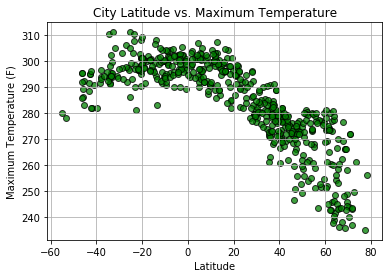

In [13]:
# Assign x values and y values for the scatter plot between latitude and max temperature
x_values = weather_data["Latitude"]
y_values = weather_data["Maximum Temperature"]

# Create the scatter plot
plt.scatter(x_values.astype(float), y_values, marker="o", facecolor="green", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Maximum Temperature")
plt.grid()

# Save the image of the scatter plot in "Images" folder
plt.savefig("./Images/lat_vs_temp_30Dec2019.png")

plt.show()

#### Latitude vs. Humidity Plot

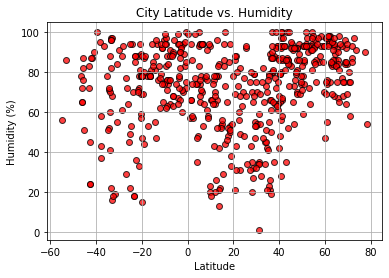

In [14]:
# Assign x values and y values for the scatter plot between latitude and max temperature
x_values = weather_data["Latitude"]
y_values = weather_data["Humidity"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", facecolor="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the image of the scatter plot in "Images" folder
plt.savefig("./Images/lat_vs_humidity_30Dec2019.png")

plt.show()

#### Latitude vs. Cloudiness Plot

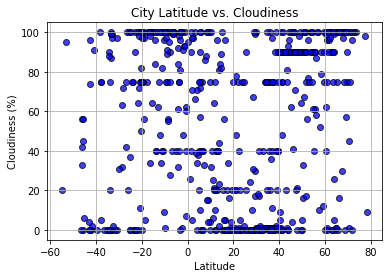

In [15]:
# Assign x values and y values for the scatter plot between latitude and max temperature
x_values = weather_data["Latitude"]
y_values = weather_data["Cloudiness"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", facecolor="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the image of the scatter plot in "Images" folder
plt.savefig("./Images/lat_vs_cloudiness_30Dec2019.png")

plt.show()

#### Latitude vs. Wind Speed Plot

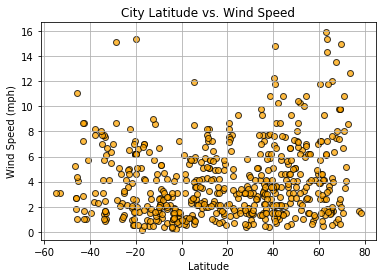

In [16]:
# Assign x values and y values for the scatter plot between latitude and max temperature
x_values = weather_data["Latitude"]
y_values = weather_data["Wind Speed"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", facecolor="orange", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the image of the scatter plot in "Images" folder
plt.savefig("./Images/lat_vs_wind_30Dec2019.png")

plt.show()